Kích thước ảnh: (1920, 2560, 3)


(-0.5, 2559.5, 1919.5, -0.5)

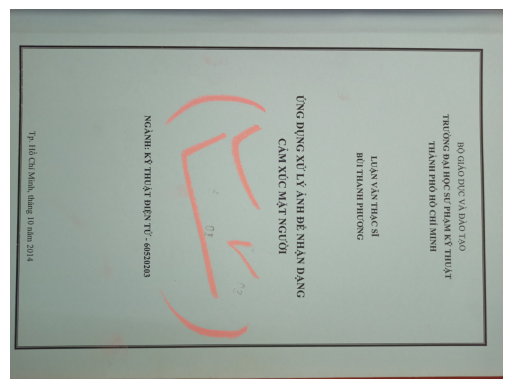

In [16]:
#Show ảnh bị hỏng
import os
import matplotlib.pyplot as plt
path = os.path.abspath(r'image/smile.jpg')
anh_hda=plt.imread(path)
print("Kích thước ảnh:", anh_hda.shape)
plt.imshow(anh_hda)
plt.axis('off')

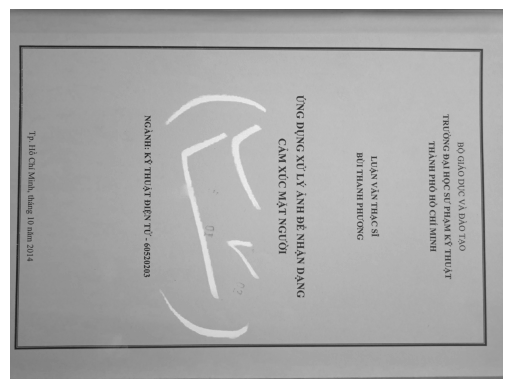

In [4]:
#Bài 3.1
red=(anh_hda[:,:,0])
plt.imshow(red, cmap='gray')
plt.axis('off')
plt.show()

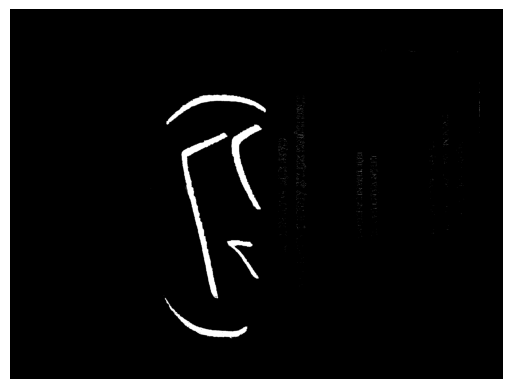

In [9]:
mask=red>190
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

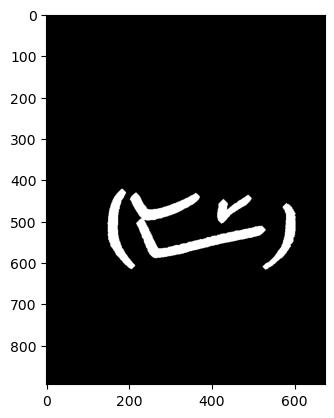

In [23]:
import numpy as np
from skimage import morphology
kernel = np.ones((5,5),np.uint8)
#mask = cv2.dilate(mask,kernel,iterations = 3)
for i in range(7):
    mask = morphology.binary_dilation(mask)
plt.imshow(mask, cmap='gray')

<class 'numpy.ndarray'>


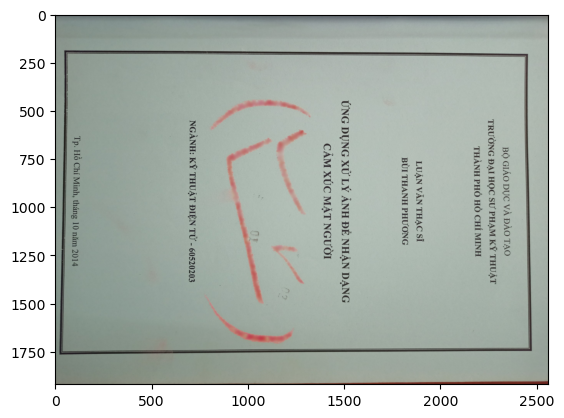

In [22]:
import skimage 
from skimage.restoration import inpaint
anh_hong = np.array(anh_hda)
# Khôi phục ảnh gốc bằng hàm inpaint_biharmonic
print(type(anh_hda))
restored_image = inpaint.inpaint_biharmonic(anh_hong, mask, channel_axis=-1)
# Hiển thị ảnh gốc và ảnh đã chỉnh sửa.
#show_image(defect_image, 'Image to restore')
plt.imshow(restored_image)

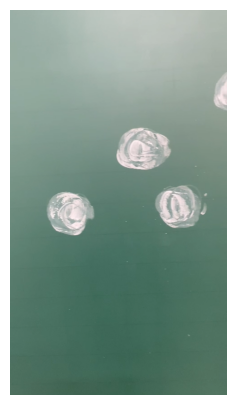

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(r'video/san_pham.mp4')

frame_index = 100 
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, img = cap.read()
frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

if ret:
    fig = plt.figure(figsize=(10, 5))
    plt.imshow(frame)
    plt.axis('off')
    plt.show()
    fig.set_size_inches(5, 3)

else:
    print('Không thể đọc khung hình thứ {} từ video.'.format(frame_index))

In [ ]:
#Bài 3.3

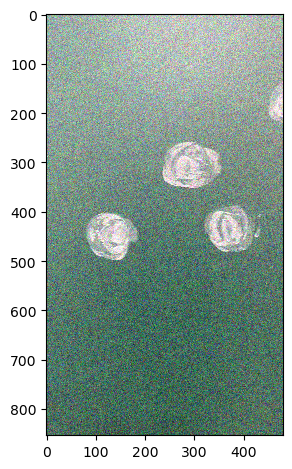

In [26]:
# Khai báo các thư viện cần thiết
from skimage.io import imshow
from skimage.util import random_noise
from skimage import io
import numpy as np
image_arr = np.asarray(frame)
# Thêm nhiễu vào trong ảnh
noisy_image = random_noise(image_arr, mode='gaussian', seed=None, clip=True)

# Hiển thị ảnh gốc và ảnh sau khi thêm nhiễu
imshow(image_arr)
imshow(noisy_image)

In [ ]:
#Bài 3.4

Original noise ratio:  2.748040663239014
Improved noise ratio:  3.2588404388639094


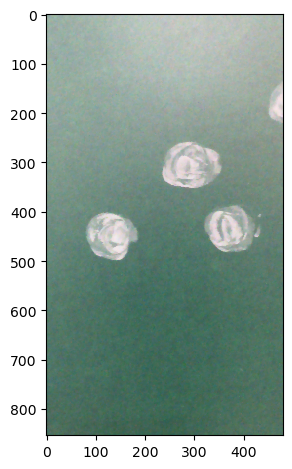

In [27]:
from skimage.restoration import denoise_tv_chambolle
denoised_image = denoise_tv_chambolle(noisy_image, channel_axis=-1)
imshow(noisy_image)
imshow(denoised_image)
original_noise_ratio=np.mean(noisy_image) / np.std(noisy_image)
Improve_noise_ratio=np.mean(denoised_image) / np.std(denoised_image)
print("Original noise ratio: ", original_noise_ratio)
print("Improved noise ratio: ", Improve_noise_ratio)

In [42]:
!pip install -U scikit-image

In [11]:
import matplotlib.pyplot as plt
def show_image(image, title='Image'):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
#Bài 3.5

In [12]:
# Khai báo các thư viện cần thiết
from skimage.io import imshow
from skimage.util import random_noise
from skimage import io
import numpy as np
image_arr = np.asarray(frame)
# Thêm nhiễu vào trong ảnh
noisy_image = random_noise(image_arr, mode='gaussian', seed=None, clip=True)

NameError: name 'frame' is not defined

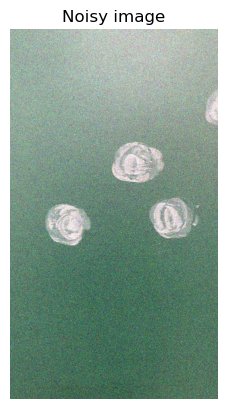

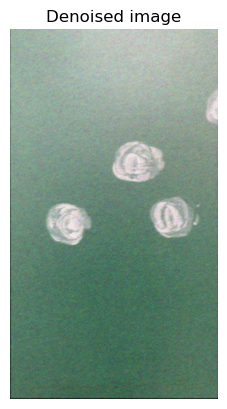

original noise ratio: 5.489864397218821
improved noise ratio: 5.489705493220692


C:\Users\Thang\AppData\Local\Temp\ipykernel_4900\809424446.py:10: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  original_noise_ratio = peak_signal_noise_ratio(img,noisy_image)
C:\Users\Thang\AppData\Local\Temp\ipykernel_4900\809424446.py:11: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  improved_noise_ratio = peak_signal_noise_ratio(img,denoised_image)


In [29]:
from skimage.metrics import peak_signal_noise_ratio
from skimage.restoration import denoise_bilateral

# Áp dụng bộ lọc bilateral filter
denoised_image = denoise_bilateral(noisy_image,channel_axis=-1)
# Hiển thị kết quả để so sánh
show_image(noisy_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

original_noise_ratio = peak_signal_noise_ratio(img,noisy_image)
improved_noise_ratio = peak_signal_noise_ratio(img,denoised_image)

print("original noise ratio:", original_noise_ratio)
print("improved noise ratio:", improved_noise_ratio)

In [17]:
import scipy
print(scipy.__version__)

1.10.1


In [ ]:
# bài 3.6

In [19]:
import cv2
cap = cv2.VideoCapture(r'video\san_pham.mp4')

frame_index = 100 
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, img = cap.read()
frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [20]:
import numpy as np
height, width, channels = frame.shape
print(f'Chiều rộng: {width}')
print(f'Chiều cao: {height}')
print(f'tổng số pixel:{width*height}')

Chiều rộng: 480
Chiều cao: 854
tổng số pixel:409920


In [ ]:
#Bài 3.7

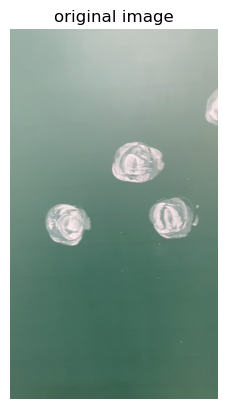

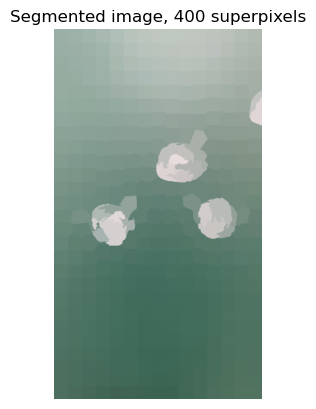

In [30]:
#Tải các thư viện cần thiết
from skimage.segmentation import slic
# khai báo hàm label2rgb từ thư viện color
from skimage.color import label2rgb

# Lấy kết quả phân vùng thành 400 vùng siêu điểm ảnh
segments = slic(frame, n_segments=400)

# Kết hợp ảnh gốc với ảnh phân đoạn để đối sánh
segmented_image = label2rgb(segments, frame, kind='avg')

# Hiển thị kết quả và so sánh
show_image(frame,'original image')
show_image(segmented_image, "Segmented image, 400 superpixels")

In [ ]:
#Bài 3.8

In [31]:
def show_image_contour(binary_image, contours):
    fig, ax = plt.subplots()
    ax.imshow(binary_image, cmap=plt.cm.gray)

    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

0.5609633731617647


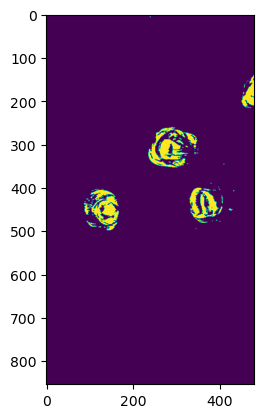

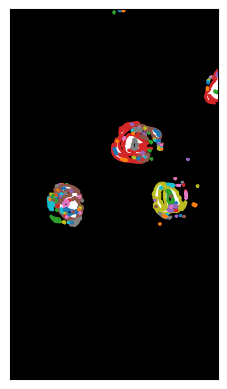

11616
3924.8603153548206


In [88]:
# Khai báo các thư viện cần dùng
from skimage import data, measure
from skimage.filters import threshold_otsu
from skimage import color
import cv2

# Chuyển ảnh RGB sang grayscale
gray_image = color.rgb2gray(img)

# Tính toán ngưỡng bằng phương pháp Otsu
thresh = threshold_otsu(gray_image)
print(thresh)
# Áp dụng kỹ thuật lấy ngưỡng
binary = gray_image > 0.7819
plt.imshow(binary)

# Tìm đường biên với tham số level phù hợp
contours = measure.find_contours(binary, 0.8)

# Hiển thị kết quả với đường bao phù hợp
show_image_contour(binary, contours)

# Tính diện tích và chu vi của đối tượng
Area = measure.regionprops(binary.astype(int))[0].area
Count = measure.regionprops(binary.astype(int))[0].perimeter

print(Area)
print(Count)

In [ ]:
# Bài 3.9

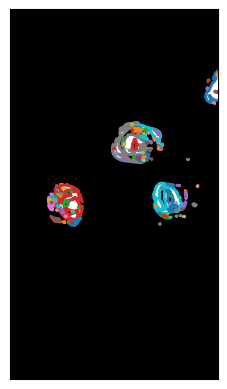

In [61]:
# khai báo thư viện cần thiết

from skimage import io, color, filters, feature
from skimage.filters import threshold_otsu

# Tạo ảnh xám từ ảnh màu ban đầu
gray = color.rgb2gray(img)
# Tính ngưỡng bằng phương pháp otsu
thresh = threshold_otsu(gray)
# Áp dụng ngưỡng để tạo ra ảnh nhị phân
thresholded_image = gray > 0.8

from skimage import measure
# Xác định các đường biên
contours = measure.find_contours(binary, 0.8)

# Hiển thị kết quả
show_image_contour(thresholded_image, contours)

In [ ]:
#Bài 3.10

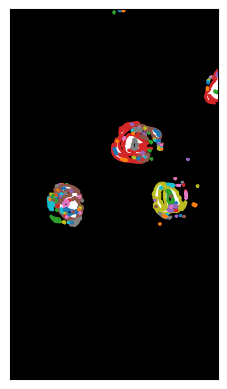

Dice's dots number: 132. 


In [89]:
# Lấy ra thông tin về chu vi của các đối tượng
shape_contours = [cnt.shape[0] for cnt in contours]

# Xác định chu vi lớn nhất của một điểm
max_dots_shape =3924.8603153548206

# Đếm số lượng điểm
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Hiển thị các đường bao đã phát hiện
show_image_contour(binary, contours)

# In ra số điểm của viên xúc xắc.
print("Dice's dots number: {}. ".format(len(dots_contours)))